### Picking the Best Model
#### Jeffrey Kwarsick, Ph.D.
#### Nov 2020

In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math
import scipy as sci
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time
from datetime import datetime
plt.style.use('ggplot')

In [4]:
def extract_data(file):
    regex_nums = r'([\d]*[.][\d]*)'
    data = []
    with open(file) as infile:
        for line in infile:
            data.extend(re.findall(regex_nums, line))
    return(data)

In [5]:
dat = extract_data("volume_problem.txt")

In [35]:
def sort_extracted_data(data):
    vol, dist = [],[]
    for i in range(len(data)):
        if i%2==0:
            vol.append(float(data[i]))
        else:
            dist.append(float(data[i]))
    return(np.array(vol), np.array(dist))

In [39]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print("# This is a polynomial of order {}.".format(o))
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

In [13]:
sorted_dat = sort_extracted_data(dat)

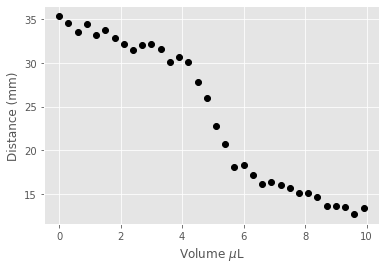

In [20]:
plt.plot(sorted_dat[0], sorted_dat[1], 'ko')
plt.ylabel("Distance (mm)")
plt.xlabel("Volume $\mu$L")
plt.show()

In [65]:
coeffs = np.polyfit(sorted_dat[0], sorted_dat[1], 6)
coeffs

array([ 9.73786494e-05, -1.01620124e-02,  2.15231306e-01, -1.71479893e+00,
        5.22240790e+00, -6.48068393e+00,  3.58504232e+01])

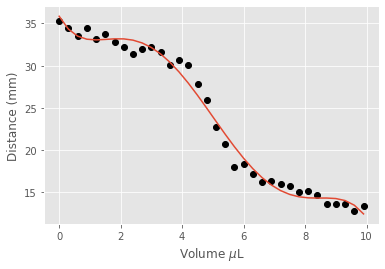

In [66]:
x = np.array(sorted_dat[0]).reshape(34,1)
y = np.polyval(coeffs, x)
plt.plot(sorted_dat[0], sorted_dat[1], 'ko')
plt.plot(x, y)
plt.ylabel("Distance (mm)")
plt.xlabel("Volume $\mu$L")
plt.show()

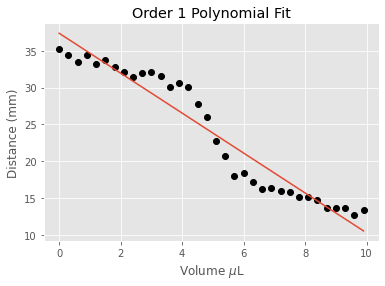

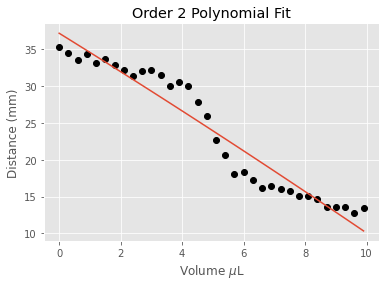

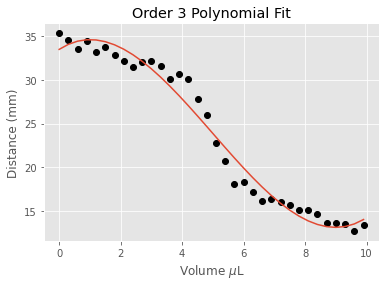

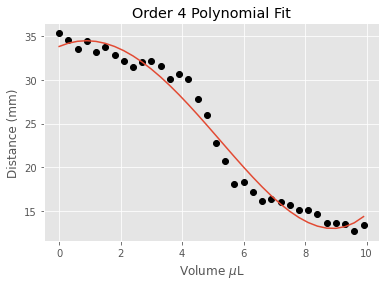

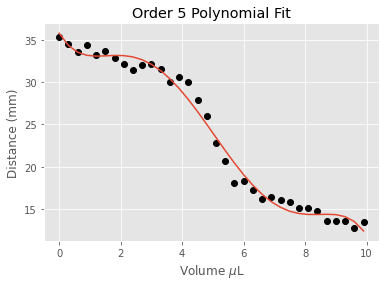

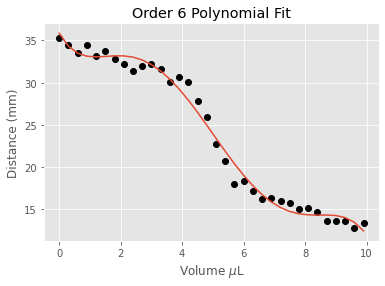

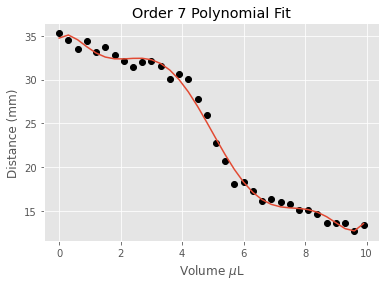

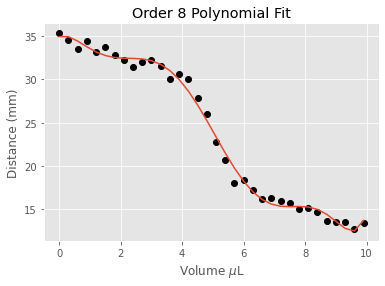

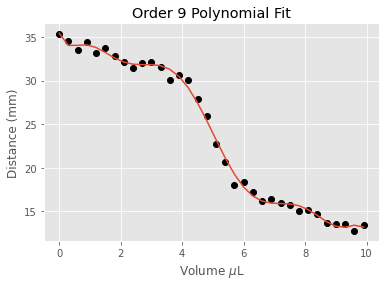

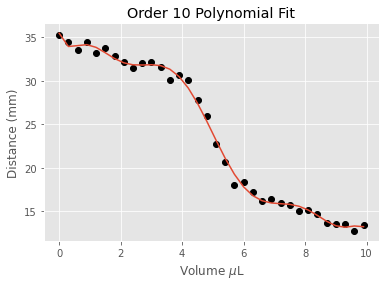

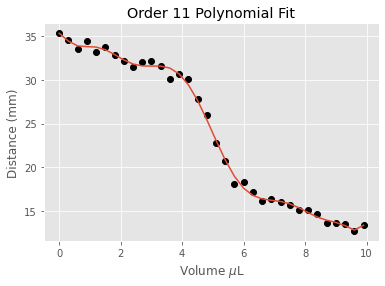

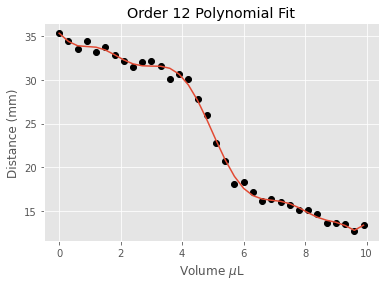

In [70]:
coeffs,ys,rsme = [],[],[]
for i in range(1,13):
    tmp = np.polyfit(sorted_dat[0], sorted_dat[1], i)
    x = np.array(sorted_dat[0]).reshape(34,1)
    y = np.polyval(tmp, x)
    rsmes = np.sqrt(mean_squared_error(sorted_dat[1], y))
    coeffs.append(tmp)
    ys.append(y)
    rsme.append(rsmes)
    plt.plot(sorted_dat[0], sorted_dat[1], 'ko')
    plt.plot(x, y)
    plt.title("Order {} Polynomial Fit".format(i))
    plt.ylabel("Distance (mm)")
    plt.xlabel("Volume $\mu$L")
    plt.show()

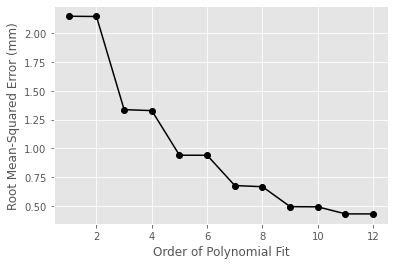

In [78]:
plt.plot(np.arange(1,13,1),rsme, "ko-")
plt.xlabel("Order of Polynomial Fit")
plt.ylabel("Root Mean-Squared Error (mm)")
plt.show()